# Description

It analyses the results of the Hardy-Weingberg equilibrium tests run previously.

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Paths

In [2]:
A1000G_GENOTYPES_DIR <- Sys.getenv("PHENOPLIER_A1000G_GENOTYPES_DIR")

In [3]:
A1000G_GENOTYPES_DIR

[1] "/opt/data/data/1000g/genotypes"

In [4]:
SUBSETS_DIR <- file.path(A1000G_GENOTYPES_DIR, "subsets")

In [5]:
SUBSETS_DIR

[1] "/opt/data/data/1000g/genotypes/subsets"

# Load data

In [6]:
hwe <- as.data.frame(read_table(file.path(SUBSETS_DIR, "all_phase3.3.hwe"), col_types = cols_only(P = "n")))

Warning message:
“Missing column names filled in: 'X10' [10]”
Warning message:
“14040497 parsing failures.
row col   expected    actual                                                      file
  1  -- 10 columns 9 columns '/opt/data/data/1000g/genotypes/subsets/all_phase3.3.hwe'
  2  -- 10 columns 9 columns '/opt/data/data/1000g/genotypes/subsets/all_phase3.3.hwe'
  3  -- 10 columns 9 columns '/opt/data/data/1000g/genotypes/subsets/all_phase3.3.hwe'
  4  -- 10 columns 9 columns '/opt/data/data/1000g/genotypes/subsets/all_phase3.3.hwe'
  5  -- 10 columns 9 columns '/opt/data/data/1000g/genotypes/subsets/all_phase3.3.hwe'
... ... .......... ......... .........................................................
See problems(...) for more details.
”


In [7]:
dim(hwe)

[1] 14040497        1

In [8]:
head(hwe)

,P
,<dbl>
1,4.243e-22
2,2.849e-215
3,5.985e-01
4,5.985e-01
5,4.026e-01
6,3.400e-03


# Histogram on all SNPs

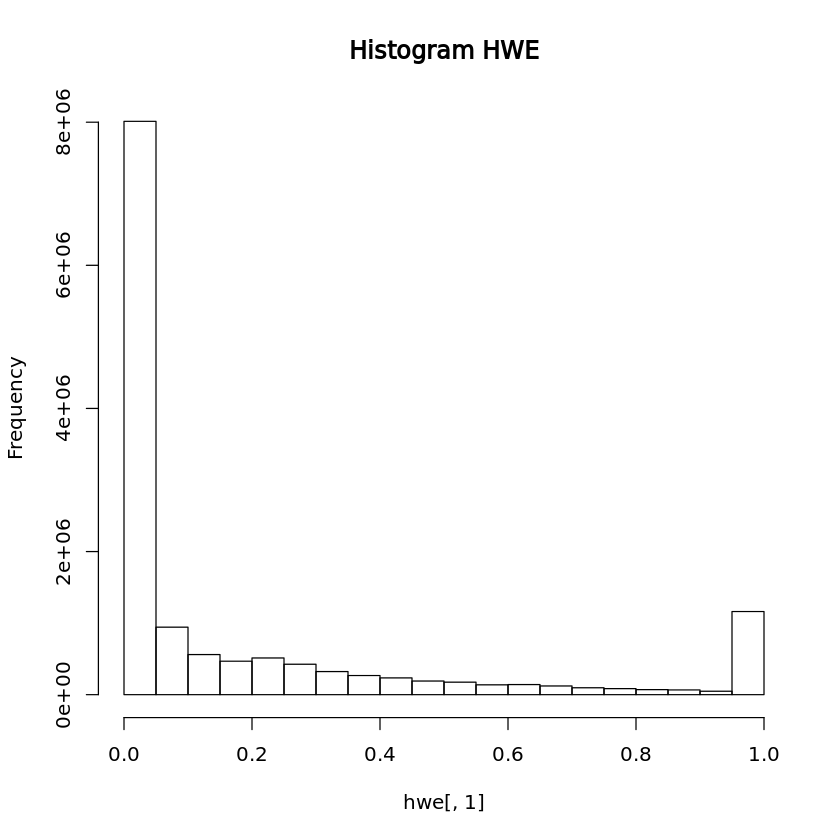

In [9]:
hist(hwe[, 1], main = "Histogram HWE")

# Histogram on strongly HWE deviating SNPs only

In [13]:
hwe %>%
  filter(P < 1e-1) %>%
  dim_desc()

[1] "[8,954,650 x 1]"

In [14]:
hwe %>%
  filter(P < 1e-2) %>%
  dim_desc()

[1] "[6,220,797 x 1]"

In [15]:
hwe %>%
  filter(P < 1e-4) %>%
  dim_desc()

[1] "[3,577,592 x 1]"

In [16]:
hwe %>%
  filter(P < 1e-6) %>%
  dim_desc()

[1] "[2,408,980 x 1]"

In [17]:
hwe %>%
  filter(P < 1e-8) %>%
  dim_desc()

[1] "[1,769,807 x 1]"

In [18]:
hwe %>%
  filter(P < 1e-10) %>%
  dim_desc()

[1] "[1,370,090 x 1]"

In [19]:
hwe %>%
  filter(P < 1e-15) %>%
  dim_desc()

[1] "[829,486 x 1]"

In [24]:
hwe_zoom <- hwe %>% filter(P < 5e-6)

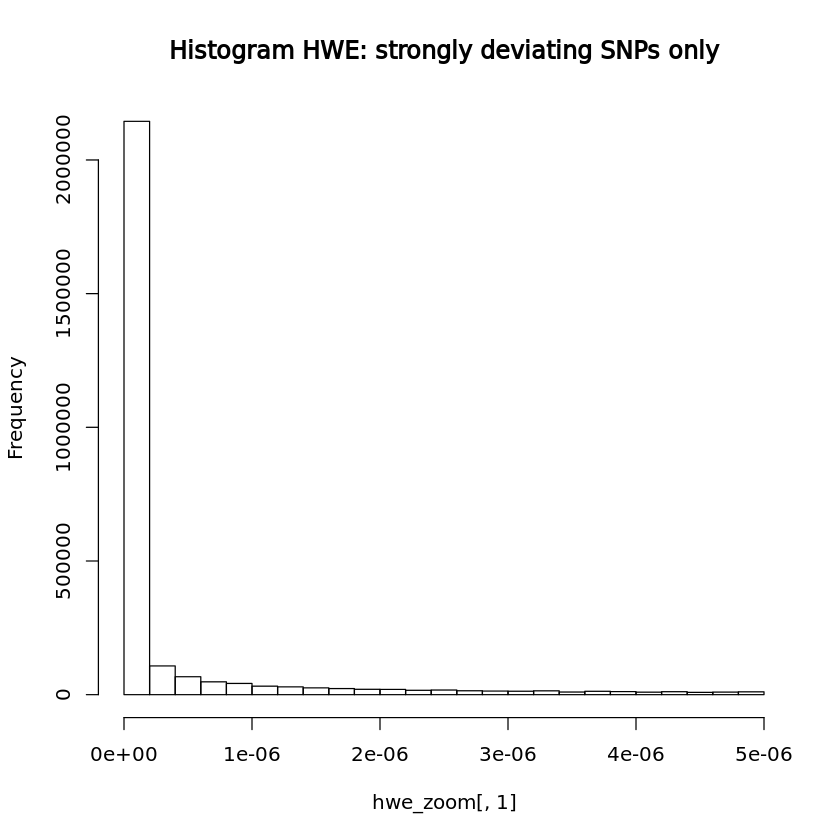

In [25]:
hist(hwe_zoom[, 1], main = "Histogram HWE: strongly deviating SNPs only")